# Principal Component Analysis - PCA
## Ein simpler Test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn import decomposition
from sklearn import datasets
from sklearn import tree
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.simplefilter("ignore")

In [2]:
# Wir brauchen mal wieder den Iris-Datensatz
iris = datasets.load_iris()
X = iris.data
y = iris.target

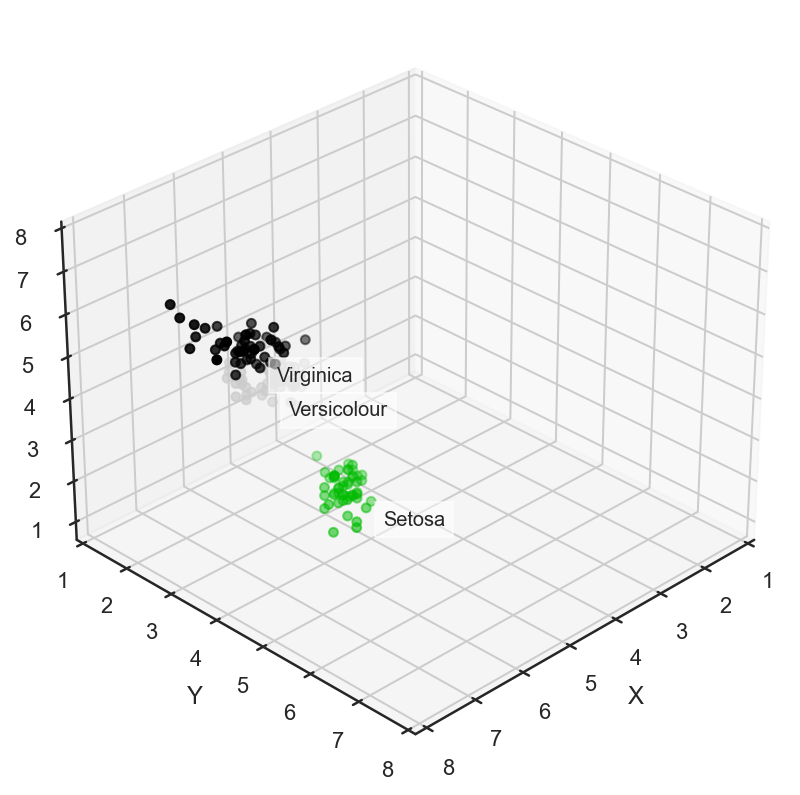

In [3]:
# Visualisierung als 3D-Daten

fig = plt.figure(1, figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=45)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

y_clr = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr, cmap=plt.cm.nipy_spectral)
#ax.w_xaxis.set_ticklabels([])
#ax.w_yaxis.set_ticklabels([])
#ax.w_zaxis.set_ticklabels([])

ax.set_xticks([1,2,3,4,5,6,7,8])
ax.set_yticks([1,2,3,4,5,6,7,8])
ax.set_zticks([1,2,3,4,5,6,7,8])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


plt.show()

## Decision Tree - Klassifizierung

Splitten des Datensatzes mit folgenden Parametern:
* stratify=y: Dies stellt sicher, dass die Aufteilung so erfolgt, dass die Klassenverteilung in y im Trainings- und Testdatensatz erhalten bleibt. Dies ist nützlich, um sicherzustellen, dass beide Datensätze repräsentative Stichproben der Gesamtdaten sind.
* random_state=42: Dies ist ein optionaler Parameter, der den Zufallszahlengenerator initialisiert. Wenn Sie denselben Wert für random_state verwenden, erhalten Sie bei jedem Durchlauf denselben Zufallssplit, was die Ergebnisse reproduzierbar macht.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Train, test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, stratify=y, random_state=42)

# Decision trees with depth = 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, preds.argmax(axis=1))))

Accuracy: 0.91667


In [11]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,preds.argmax(axis=1))
pd.crosstab(y_test, preds.argmax(axis=1), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,20,0,0,20
1,0,19,1,20
2,0,4,16,20
All,20,23,17,60


## PCA für Dimensionsreduktion

* pca = decomposition.PCA(n_components=2): Hier wird ein PCA-Objekt erstellt, das die Anzahl der zu behaltenden Hauptkomponenten auf 2 festlegt. Die Hauptkomponenten sind lineare Transformationen der Daten, die die Varianz der Daten am besten erfassen.

* X_centered = X - X.mean(axis=0): Hier werden die Daten in X zentriert, indem der Durchschnitt (Mittelwert) jeder Spalte von den Datenpunkten subtrahiert wird. Dies ist eine übliche Vorverarbeitung für PCA, um sicherzustellen, dass die Hauptkomponenten den Daten richtig entsprechen.

* pca.fit(X_centered): Hier wird die PCA auf die zentrierten Daten X_centered angewendet. Die Methode berechnet die Hauptkomponenten und speichert sie im PCA-Objekt.

* X_pca = pca.transform(X_centered): Schließlich werden die transformierten Daten in den Raum der Hauptkomponenten zurückgegeben. X_pca enthält die Datenpunkte, die durch die ersten zwei Hauptkomponenten repräsentiert werden, da wir n_components=2 in Schritt 1 festgelegt haben.

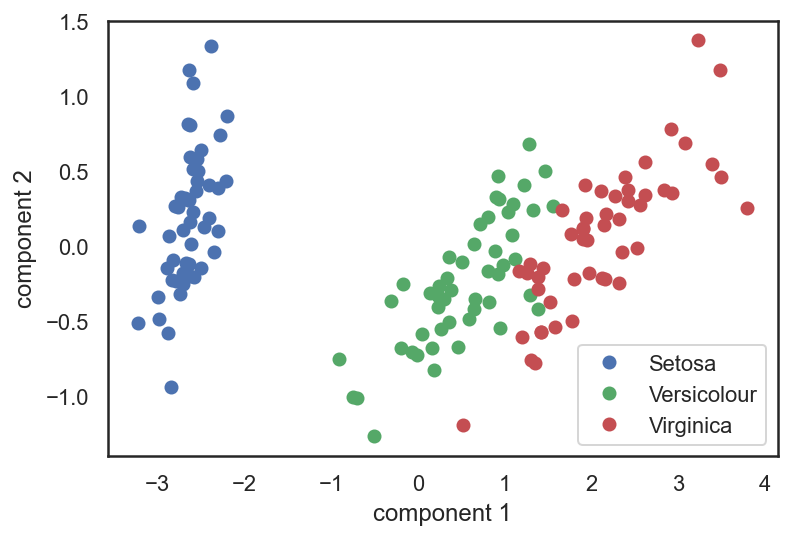

In [6]:
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# Plotting the results of PCA
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.ylabel('component 2')
plt.xlabel('component 1')
plt.legend(loc=0);

## Was steckt drin in den Hauptkomponenten?

In [12]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component, iris.feature_names)))

1 component: 92.46% of initial variance
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
2 component: 5.31% of initial variance
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


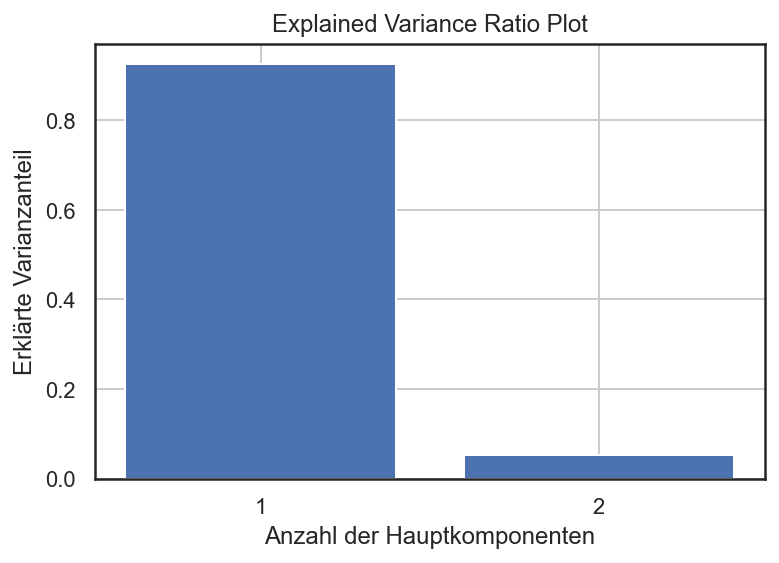

In [13]:
x_ticks = range(1, len(pca.explained_variance_ratio_) + 1)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, tick_label=x_ticks)
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('Erklärte Varianzanteil')
plt.title('Explained Variance Ratio Plot')
plt.grid()

plt.show()

## Decision Tree mit PCA-Daten

In [18]:
# Test-train split and apply PCA
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.4, stratify=y, random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
y_pred_2= clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, preds.argmax(axis=1))))

Accuracy: 0.93333


Modellbildung mit dem PCA-transformierten Datensatz bringt ein besseres Modellergebnis (bezogen auf die accuracy). Der Unterschied ist bei diesem Datensatz aufgrund der wenigen Freiheitsgrade (Dimensionen) gering. Bei Datensätzen mit höheren Dimensionen kann die PCA aber zu einer drastischen Verbesserung bei der Anwendung von Regressions- / Klassifikationsalgorithmen führen.

[Text(0.4, 0.8333333333333334, 'x[0] <= -1.553\ngini = 0.667\nsamples = 60\nvalue = [20, 20, 20]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0]'),
 Text(0.6, 0.5, 'x[0] <= 1.132\ngini = 0.5\nsamples = 40\nvalue = [0, 20, 20]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.095\nsamples = 20\nvalue = [0, 19, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.095\nsamples = 20\nvalue = [0, 1, 19]')]

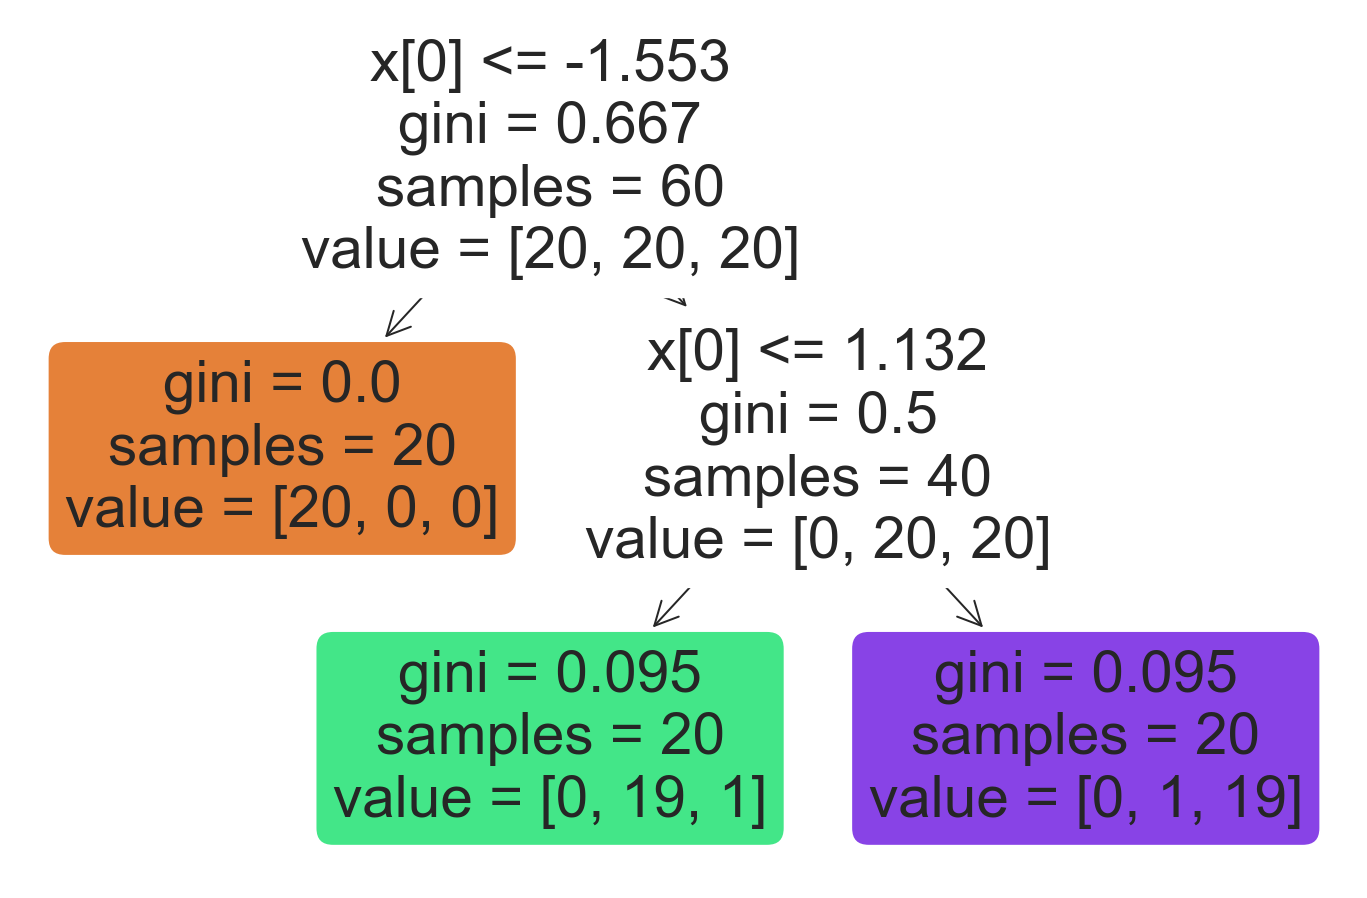

In [15]:
# Baumstruktur anzeigen
plt.figure(figsize=(12,8))
tree.plot_tree(clf.fit(X_test, y_test), filled=True, rounded = True)